In [1]:
print("Hello World")

Hello World


In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

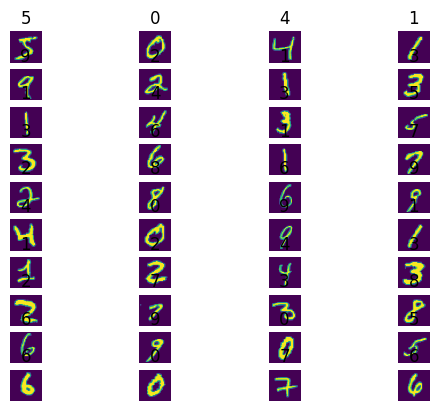

In [4]:
x,y=10,4
for i in range(40):
    plt.subplot(x,y,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis('off')

In [5]:
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = ( img_rows, img_cols,1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [7]:
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = ( img_rows, img_cols,1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#model added
model=Sequential()
#model Convolutional Layer. it makes filter and it detects sides and edges
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
#Pooling Layer . it makes downsampling,and also helps decreasing cost function.
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#Fully Connected Layer. it looks like neural network.
#this makes connections between layers
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [14]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# Veri yükleme
(x_train, y_train), (x_test, y_test) = mnist.load_data()

batch_size = 256
num_classes = 10
epochs = 3
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Etiketleri kategorik hale getirme
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model oluşturma
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Modeli derleme
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Modeli eğitme
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


Epoch 1/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 137s 567ms/step - accuracy: 0.8256 - loss: 0.5630 - val_accuracy: 0.9809 - val_loss: 0.0594
Epoch 2/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 148s 629ms/step - accuracy: 0.9717 - loss: 0.0942 - val_accuracy: 0.9862 - val_loss: 0.0413
Epoch 3/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 603ms/step - accuracy: 0.9803 - loss: 0.0654 - val_accuracy: 0.9886 - val_loss: 0.0348


In [15]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.03481648489832878
Test accuracy: 0.9886000156402588


In [33]:
test_image=x_test[7]
y_test[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

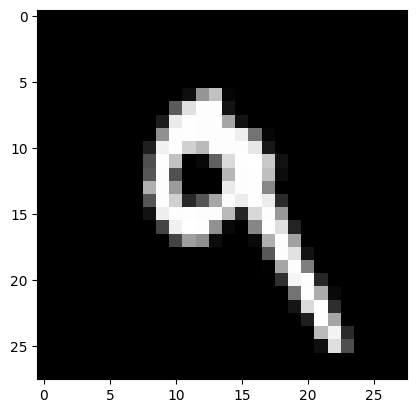

In [34]:
plt.imshow(test_image.reshape(28,28),cmap='gray')

In [ ]:
import numpy as np

test_data = x_test[7].reshape(1, 28, 28, 1)

probas = model.predict(test_data, batch_size=1)

predicted_class = np.argmax(probas, axis=1)

print("Sınıf olasılıkları:", probas)
print("Tahmin edilen sınıf:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Sınıf olasılıkları: [[3.5560170e-08 2.8370480e-06 9.6716440e-06 7.4107766e-06 1.6420413e-04
  4.8755457e-05 1.0449294e-07 3.0110849e-07 7.9187035e-04 9.9897480e-01]]
Tahmin edilen sınıf: [9]
